In [1]:
import networkx as nx
import syft as sy
import numpy as np
import matplotlib.pyplot as plt
import pprint

from syft.service.action.action_graph_service import ActionGraphService
from syft.service.action.action_graph import InMemoryActionGraphStore, InMemoryGraphConfig, InMemoryStoreClientConfig
from syft.service.context import AuthedServiceContext
from syft.node.credentials import SyftSigningKey
from syft.service.action.action_graph import Action, NodeActionData, NodeActionDataUpdate
from syft.service.action.action_graph import ActionStatus
from syft.service.action.numpy import NumpyArrayObject, ActionObject
from syft.service.action.action_graph import NetworkXBackingStore
from syft.types.datetime import DateTime


print(sy.__version__)

kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /home/dk/Desktop/projects/PySyft


0.8.0-beta.9


In [2]:
store_config = InMemoryGraphConfig()
verify_key = SyftSigningKey.generate().verify_key
graph_store = InMemoryActionGraphStore(store_config=store_config)

# create some actions and add them to the graph store
action_obj_a = ActionObject.from_obj([2, 4, 6])
action_obj_b = ActionObject.from_obj([2, 3, 4])
# action1 -> a + b = c
action1 = Action(
    path="action.execute",
    op="__add__",
    remote_self=action_obj_a.syft_lineage_id,
    args=[action_obj_b.syft_lineage_id],
    kwargs={},
)
graph_store.set(credentials=verify_key, action=action1)

# action2 -> initialization of variable d
action_obj_d = ActionObject.from_obj([1, 2, 3])
action2 = Action(
    path="action.execute",
    op="np.array",
    remote_self=None,
    args=[action_obj_d.syft_lineage_id],
    kwargs={},
)
graph_store.set(credentials=verify_key, action=action2)

# action3 -> c * d
action3 = Action(
    path="action.execute",
    op="__mul__",
    remote_self=action1.result_id,
    args=[action2.result_id],
    kwargs={},
)
graph_store.set(credentials=verify_key, action=action3)

Ok(class NodeActionData:
  id: str = b1a079a5d8b243dd948a95ea8b054e45
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-28 05:14:05
  updated_at: str = 2023-04-28 05:14:05
  user_verify_key: str = da2650b987fa77e24068e781e2c1c0522adecb5e49a9c6b17056686c23a3fb21
  is_mutated: str = False
)

In [3]:
# # action4 -> d.astype('int32')
# as_type_action_obj = ActionObject.from_obj("np.int32")
# action4 = Action(
#     path="action.execute",
#     op="astype",
#     remote_self=action2.result_id,
#     args=[as_type_action_obj.syft_lineage_id],
#     kwargs={},
#     result_id=action2.result_id,
# )
# graph_store.set(credentials=verify_key, action=action4)

# # check if the node action 2 has been mutated
# node_action_data_2: NodeActionData = graph_store.get(
#     uid=action2.id, credentials=verify_key
# ).ok()
# assert node_action_data_2.is_mutated == True
    
# arg_action_obj = ActionObject.from_obj(48)
# action5 = Action(
#     path="action.execute",
#     op="__add__",
#     remote_self=action4.result_id,
#     args=[arg_action_obj.syft_lineage_id],
#     kwargs={},
# )
# graph_store.set(credentials=verify_key, action=action5)

In [4]:
graph_store.nodes.ok()

NodeDataView({<UID: d40f41944f3b40b39896559eb903ba02>: {'data': class NodeActionData:
  id: str = d40f41944f3b40b39896559eb903ba02
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-28 05:07:35
  updated_at: str = 2023-04-28 05:07:35
  user_verify_key: str = 5db5b9bcad7dc2aba52ffc29e168e36732a68cb73daf6b1d001d7454f4e8d65b
  is_mutated: str = False
}, <UID: cec137165a06472fb3f6728fbf5bd519>: {'data': class NodeActionData:
  id: str = cec137165a06472fb3f6728fbf5bd519
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-28 05:07:35
  updated_at: str = 2023-04-28 05:07:35
  user_verify_key: str = 5db5b9bcad7dc2aba52ffc29e168e36732a68cb73daf6b1d001d7454f4e8d65b
  is_mutated: str = False
}, <UID: c73a4f312fe14fb796ed67aa49878965>: {'data': class NodeActionData:
  id: str = c73a4f312fe14fb796ed67aa49878965
  action:

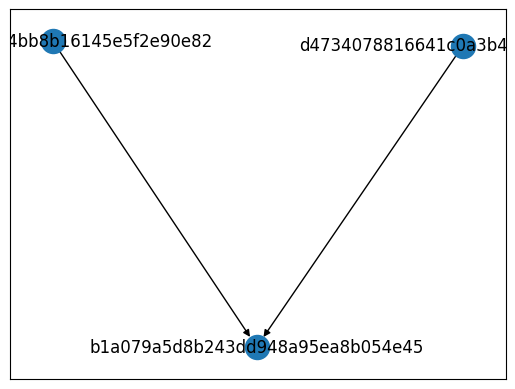

In [3]:
graph_store.graph.visualize()

In [6]:
data = nx.cytoscape_data(graph_store.graph.db)
bytes_data = sy.serialize(data, to_bytes=True)
data_back = sy.deserialize(bytes_data, from_bytes=True)
graph_back = nx.cytoscape_graph(data_back)
graph_back.nodes(data=True)

NodeDataView({<UID: d40f41944f3b40b39896559eb903ba02>: {'data': class NodeActionData:
  id: str = d40f41944f3b40b39896559eb903ba02
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-28 05:07:35
  updated_at: str = 2023-04-28 05:07:35
  user_verify_key: str = 5db5b9bcad7dc2aba52ffc29e168e36732a68cb73daf6b1d001d7454f4e8d65b
  is_mutated: str = False
, 'id': 'd40f41944f3b40b39896559eb903ba02', 'value': <UID: d40f41944f3b40b39896559eb903ba02>, 'name': 'd40f41944f3b40b39896559eb903ba02'}, <UID: cec137165a06472fb3f6728fbf5bd519>: {'data': class NodeActionData:
  id: str = cec137165a06472fb3f6728fbf5bd519
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-28 05:07:35
  updated_at: str = 2023-04-28 05:07:35
  user_verify_key: str = 5db5b9bcad7dc2aba52ffc29e168e36732a68cb73daf6b1d001d7454f4e8d65b
  is_mutated: str =

In [7]:
assert graph_back.edges() == graph_store.edges.ok()

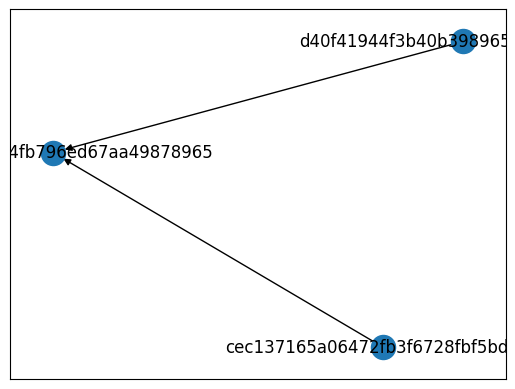

In [8]:
nx.draw_networkx(graph_back)

In [10]:
bytes = sy.serialize(graph_store, to_bytes=True)
graph_back = sy.deserialize(bytes, from_bytes=True)

In [25]:
graph_back

In [23]:
graph_back.nodes.ok() == graph_store.nodes.ok()

True

In [24]:
graph_back.edges.ok() == graph_store.edges.ok()

True

In [17]:
for i, j in zip(graph_store.nodes.ok(), graph_back.nodes(data=True)):
    print(i[0] == j[0])
    print(i[1]['data'] == j[1]['data'])

True
True
True
True
True
True


In [26]:
data: dict = nx.node_link_data(graph_store.graph.db)
bytes_data = sy.serialize(data, to_bytes=True)
data_back = sy.deserialize(bytes_data, from_bytes=True)
graph_back = nx.node_link_graph(data_back)
graph_back.nodes(data=True)

NodeDataView({<UID: d40f41944f3b40b39896559eb903ba02>: {'data': class NodeActionData:
  id: str = d40f41944f3b40b39896559eb903ba02
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-28 05:07:35
  updated_at: str = 2023-04-28 05:07:35
  user_verify_key: str = 5db5b9bcad7dc2aba52ffc29e168e36732a68cb73daf6b1d001d7454f4e8d65b
  is_mutated: str = False
}, <UID: cec137165a06472fb3f6728fbf5bd519>: {'data': class NodeActionData:
  id: str = cec137165a06472fb3f6728fbf5bd519
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-28 05:07:35
  updated_at: str = 2023-04-28 05:07:35
  user_verify_key: str = 5db5b9bcad7dc2aba52ffc29e168e36732a68cb73daf6b1d001d7454f4e8d65b
  is_mutated: str = False
}, <UID: c73a4f312fe14fb796ed67aa49878965>: {'data': class NodeActionData:
  id: str = c73a4f312fe14fb796ed67aa49878965
  action:

In [27]:
type(data_back)

dict

In [22]:
for i, j in zip(graph_store.nodes.ok(), graph_back.nodes(data=True)):
#     print(i[0] == j[0])
#     print(i[1]['data'] == j[1]['data'])
    print(j)

(<UID: d40f41944f3b40b39896559eb903ba02>, {'data': class NodeActionData:
  id: str = d40f41944f3b40b39896559eb903ba02
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-28 05:07:35
  updated_at: str = 2023-04-28 05:07:35
  user_verify_key: str = 5db5b9bcad7dc2aba52ffc29e168e36732a68cb73daf6b1d001d7454f4e8d65b
  is_mutated: str = False
})
(<UID: cec137165a06472fb3f6728fbf5bd519>, {'data': class NodeActionData:
  id: str = cec137165a06472fb3f6728fbf5bd519
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-28 05:07:35
  updated_at: str = 2023-04-28 05:07:35
  user_verify_key: str = 5db5b9bcad7dc2aba52ffc29e168e36732a68cb73daf6b1d001d7454f4e8d65b
  is_mutated: str = False
})
(<UID: c73a4f312fe14fb796ed67aa49878965>, {'data': class NodeActionData:
  id: str = c73a4f312fe14fb796ed67aa49878965
  action: str = syft

In [23]:
graph_store.nodes.ok() == graph_back.nodes(data=True)

True

### So the `VaidationError` happens after we update a node. Look into the `NodeActionDataUpdate` class and the `update` method of `InMemoryActionGraphStore` to solve this problem

In [10]:
x = NodeActionDataUpdate(is_mutated=True)
x.to_dict(exclude_empty=True)
x

```python
class NodeActionDataUpdate:
  id: str = <class 'syft.types.syft_metaclass.Empty'>
  action: str = <class 'syft.types.syft_metaclass.Empty'>
  status: str = <class 'syft.types.syft_metaclass.Empty'>
  retry: str = <class 'syft.types.syft_metaclass.Empty'>
  created_at: str = <class 'syft.types.syft_metaclass.Empty'>
  updated_at: str = 2023-04-28 05:07:35
  credentials: str = <class 'syft.types.syft_metaclass.Empty'>
  is_mutated: str = True

```

The problem lies in `updated_at` variable and the function with pydantic validator

```python
update_at: Optional[DateTime]
@pydantic.validator("updated_at", pre=True, always=True)
def make_updated_at(cls, v: Optional[DateTime]) -> DateTime:
    data = DateTime.now() if v is None else v
    return data
```

In [11]:
dex = sy.deserialize(sy.serialize(x))
dex

ValidationError: 1 validation error for DateTime
id
  none is not an allowed value (type=type_error.none.not_allowed)

In [ ]:
dex == x

In [ ]:
action1 = Action(
    path="action.execute",
    op="__add__",
    remote_self=action_obj_a.syft_lineage_id,
    args=[action_obj_b.syft_lineage_id],
    kwargs={},
)
node = NodeActionData(action=action1, user_verify_key=verify_key)

In [ ]:
node

In [ ]:
de_node = sy.deserialize(sy.serialize(node))
node

In [ ]:
from datetime import datetime
from pydantic import BaseModel


class User(BaseModel):
    id: int
    name = 'John Doe'
    signup_ts: DateTime | None = None
    friends: list[int] = []


external_data = {
    'id': '123',
    'signup_ts':  None,
    'friends': [1, 2, '3'],
}

In [ ]:
user = User(**external_data)

In [ ]:
user